## 0\. RFM Analysis Analysis Using Python

### 0\.1 Introduction

The objectives of this project is to  help the ACME Engineering company have the deeper look at behaviors of customers from the dataset of SuperStoreOrders (focus on the year of 2011 - 2014) by analizing related factors such as the purschase day and monetary value, eventually the ranking of customer. Additionally, there will be visualization for the business to have better understanding.

This project will rate customer based on RFM score, and class them into groups related to value brings.

To achieve the purpose, RFM Analysis will be deployed in this project, below is the explanation of RFM Analysis.

### 0\.2 What is RFM Analysis?
**RFM** stands for **R**ecency, **F**requency, **M**onetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Let’s assume we are a company, our company name is _ACME Engineering_, let’s perform the RFM analysis on our customers:

1. Recency: How recently has the customer made a transaction with us,
2. Frequency: How frequent is the customer in ordering/buying some product from us (within a time period),
3. Monetary: How much does the customer spend on purchasing products from us.


## 1\. Getting Started

To achieve the object of the report and to deploy the RFM Analysis successfully, we need some necessary libraries, input the accessible dataset.

The programming language using is Python.

### 1\.1 Import the necessary libraries

We are looking at the dataset of the year 2011-2014 and with the consider of datetime variables to have better understanding, we need to import **datetime** library - supporting working with datetime variable.

**numpy** will help us working with the dataset by using dataframe and **matplotlib.plot** helps plotting visualization for ACME Engineering company understanding purpose.

In [ ]:
# Import necessary libraries support working with datetime variable, dataframe and visualization
import pandas as pd
import datetime as dt
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt


### 1\.2 Load the dataset

Next, we import the dataset and have an overview look about the columns and the values of first five row.

The dataset has 21 columns.

In [ ]:
# Import the dataset and show Overview
df = pd.read_excel('SuperStoreOrders.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,Segment,State,country,market,region,...,Category,Sub Category,product_name,Sales,Quantity,Discount,Profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


## 2\. RFM Calculations

In this step, we will deploy the RFM Calculations. There are some features that we look at that can help business understand about the dataset:

*   Recency
*   Frequency
*   Monetary Value

After calculating 3 above features, we will merge the calculated columns into a dataframe to have better overview about the behavior of them.

### 2\.1 Calculate Recency

In this step, we calculate Recency by steps:

- Looking at *order_date* column
- Tranform the *order_date* column into panda datetime object for processing
- Group *order_date* by *customer_name* and change the name of the column to *CustomerName* and *LastPurschaseDate* to easier understanding
- Find rencency of customers and print out

In [ ]:
df['order_date']=pd.to_datetime(df['order_date'])

# Caculating recency

df_recency = df.groupby(by='customer_name', as_index=False)['order_date'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()

df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

# Print the overview of the result (First five rows)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2014-12-15,16
1,Aaron Hawkins,2014-12-19,12
2,Aaron Smayling,2014-12-05,26
3,Adam Bellavance,2014-12-06,25
4,Adam Hart,2014-12-29,2


### 2\.2 Calculate Frequency

In this step, we calculating the frequency by steps:
- Looking at *customer_name* and *order_date* columns
- Remove duplicate values from the dataframe with drop_duplicates()
- Group the *order_date* by *customer_name*
- Count the number of order date of each customer_name, we will have the frequency of customers

In [ ]:
# Remove duplicates and calculating frequency
frequency_df = df.drop_duplicates().groupby(
    by=['customer_name'], as_index=False)['order_date'].count()
frequency_df.columns = ['CustomerName', 'Frequency']

# Print the overview of the result
frequency_df.head()

,CustomerName,Frequency
0,Aaron Bergman,89
1,Aaron Hawkins,56
2,Aaron Smayling,60
3,Adam Bellavance,68
4,Adam Hart,84


### 2\.3 Calculating Monetary Value

Next, we calculate the *Monetary* value by steps:
- Using *Quantity* column (the number of product customer order each time) and Sales column
- Multiply the *Sale* with *Quantity* column to have the Total column
- For business understanding, group the *Total* column by the *customer_name*
- Change the column name into *CustomerName* and *Monetary* instead of keeping technical name for business purpose

In [ ]:
# Calculating Monetary
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='customer_name', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']

# Print overview of the result
monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,120367
1,Aaron Hawkins,102028
2,Aaron Smayling,64397
3,Adam Bellavance,109591
4,Adam Hart,91439


### 2\.4 Merge R, F, and M into one dataframe

Finally in RFM analysis step, we merge 3 dataframe tables we have calculated for Recency, Frequency, Monetary into one table and merge on CustomerName


In [ ]:
# Merge 3 dataframe table into one, by CustomerName
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')

# Print overview of RFM table
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,16,89,120367
1,Aaron Hawkins,12,56,102028
2,Aaron Smayling,26,60,64397
3,Adam Bellavance,25,68,109591
4,Adam Hart,2,84,91439


### 2\.5 Customer Ranking

In this step, we caclulate the ranking of customer based on the RFM table for each customer and give score of each customer by:

*   Recency
*   Frequency
*   Monetary

#### 2\.5.1 Ranking Customers after RFM analysis

We calculate the numerical rank of RFM of each customer based on the existing list, using buil-in method rank()

For RFM ranking, we order them in different way depend on the insights we want to bring to business.
- Recency ranking is not in ascending order
- While Frequency and Monetary ranking will be in ascending order

In [ ]:
# Calcualating Ranking and Ordering by ascending or not
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

#### 2\.5.2 Here we are normalizing data by scaling the value related to max value
- The variables we found above are not normalized, which will cause unrelated/fail insights finding and can't help business understand the data effeciently
- The option is we need to normalize data by using the max value in each column.
- Formula for this step is applied for all 3 columns *R_rank*, *F_rank* and *M_rank*:

# `(value/max_value_of_the_list)*100`

- After that, we create three new columns for easier visualization of what we did in this step, *R_rank_norm*, *M_rank_norm* and *F_rank_norm*

In [ ]:
# Normalizing R_rank
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# Print the overview of the result
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,16,89,120367,50.931278,96.666667,96.666667
1,Aaron Hawkins,12,56,102028,62.363520,27.735849,27.735849
2,Aaron Smayling,26,60,64397,35.324342,38.616352,38.616352
3,Adam Bellavance,25,68,109591,37.251124,62.075472,62.075472
4,Adam Hart,2,84,91439,89.659602,92.138365,92.138365


## 3\. Main Analysis

Last step, we move on main analysis:
- In business analytics, to  divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others by using the above dataframe frame in step 2, we have to calculate RFM Score and do visualization.

### 3\.1 Calculate the RFM Score

- RFM score is calculated by using different weights:

 +) **Recency**: How recently has the customer made a transaction with us - weight *0.15*

 +) **Frequency**: How frequent is the customer in ordering/buying some product from us (within a time period) - weight *0.28*

 +) **Monetary**: How much does the customer spend on purchasing products from us - *weight 0.57*

- Multiply RFM score for 0.05 and round to 2 digits after dot for better looking

In [ ]:
# Calculating RFM Score
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm'] + 0.28 * rfm_df['F_rank_norm'] + 0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

# Print the overview of 7 columns of 2 columns CustomerName and RFM_Score
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Aaron Bergman,4.49
1,Aaron Hawkins,1.65
2,Aaron Smayling,1.91
3,Adam Bellavance,2.92
4,Adam Hart,4.59
5,Adam Shillingsburg,3.35
6,Adrian Barton,3.70


## 3\.2 Rate customers based on the RFM Score

With the given result, we rate the customer before visualization.

**We divide customer into 5 different groups:**

1.   *Top Customers*: customer who have RFM Score higher than 4.5
2.   *High Value Customer*: customer who has RFM Score higher than 4
1.   *Medium Value Customer*: customer who has RFM Score higher than 3
2.   *Low Value Customer*: customer who has RFM Score higher than 1.6
1.   *Lost Customer*: customer who have RFM Score equal to or lower than 1.6









In [ ]:
# Create new column named Customer_segment and divide customers into 5 groups
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
                                          rfm_df['RFM_Score'] > 3,
                                           "Medium Value Customer",
                                            np.where(rfm_df['RFM_Score'] > 1.6,
                                            'Low Value Customers', 'Lost Customers'))))))

# Print the overview result with 20 first rows of 3 columns Customer Name, RFM Score and the Segment Customer belong to
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Aaron Bergman,4.49,High value Customer
1,Aaron Hawkins,1.65,Low Value Customers
2,Aaron Smayling,1.91,Low Value Customers
3,Adam Bellavance,2.92,Low Value Customers
4,Adam Hart,4.59,Top Customers
5,Adam Shillingsburg,3.35,Medium Value Customer
6,Adrian Barton,3.70,Medium Value Customer
7,Adrian Hane,0.96,Lost Customers
8,Adrian Shami,0.41,Lost Customers
9,Aimee Bixby,1.35,Lost Customers


## 4\. Visualization

Last step of the project, to help ACME Engineering company understand about the data more, the pie plot is created based on different segments we found above.


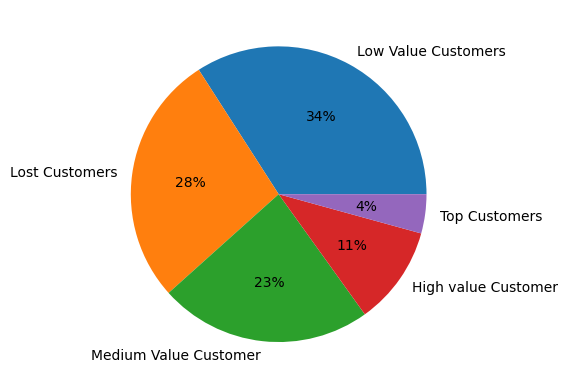

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')

# Show the pie plot
plt.show()

## 5\. Conclusions

From the given dataset, from the year of 2011 - 2014, ACME Engineering had:
- There are 34% of customers in Low Value ( 1.6 < RFM Score <= 3), take the highest propation in the chart.
- 28% of customers in Lost Customers segments ( RFM Score < 1.6)
- Up to 23% of customers in Medium Value Customer segment ( 3 < RFM Score <= 4)
- Only 11% of customers are in High Value Customer ( 4 <  RFM Score <= 4.5)
- Only 4% of the customers are in Top Customer ( RFM Score > 4.5)

Overall, ACME Engineering company had up to 62% of customer in Low Value and Lost customer.

--> The company should research more about the customer service, products. Increasing customer experience will help company to keep more customers and make customers bring more values. Research into new market and improving the current market is good step.

On the other hand, only 38% of customers are in Medium Value and Higher group.

--> The company should understand more about customers in this segment, improving customer experience to keep them contribute in the future.